## Importación del CSV

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [3]:
# dtype casting from https://www.kaggle.com/theoviel/load-the-totality-of-the-data
dtypes = {
    #'MachineIdentifier':                                    'category',
    'ProductName':                                          'category',
    'EngineVersion':                                        'category',
    'AppVersion':                                           'category',
    'AvSigVersion':                                         'category',
    'IsBeta':                                               'int8',
    'RtpStateBitfield':                                     'float32',
    'IsSxsPassiveMode':                                     'int8',
    'DefaultBrowsersIdentifier':                            'float32',
    'AVProductStatesIdentifier':                            'float32',
    'AVProductsInstalled':                                  'float32',
    'AVProductsEnabled':                                    'float32',
    'HasTpm':                                               'int8',
    'CountryIdentifier':                                    'int32',
    'CityIdentifier':                                       'float32',
    'OrganizationIdentifier':                               'float32',
    'GeoNameIdentifier':                                    'float32',
    'LocaleEnglishNameIdentifier':                          'int32',
    'Platform':                                             'category',
    'Processor':                                            'category',
    'OsVer':                                                'category',
    'OsBuild':                                              'int16',
    'OsSuite':                                              'int16',
    'OsPlatformSubRelease':                                 'category',
    'OsBuildLab':                                           'category',
    'SkuEdition':                                           'category',
    'IsProtected':                                          'float32',
    'AutoSampleOptIn':                                      'int8',
    'PuaMode':                                              'category',
    'SMode':                                                'float32',
    'IeVerIdentifier':                                      'float32',
    'SmartScreen':                                          'category',
    'Firewall':                                             'float32',
    'UacLuaenable':                                         'float64',
    'Census_MDC2FormFactor':                                'category',
    'Census_DeviceFamily':                                  'category',
    'Census_OEMNameIdentifier':                             'float32',
    'Census_OEMModelIdentifier':                            'float32',
    'Census_ProcessorCoreCount':                            'float32',
    'Census_ProcessorManufacturerIdentifier':               'float32',
    'Census_ProcessorModelIdentifier':                      'float32',
    'Census_ProcessorClass':                                'category',
    'Census_PrimaryDiskTotalCapacity':                      'float32',
    'Census_PrimaryDiskTypeName':                           'category',
    'Census_SystemVolumeTotalCapacity':                     'float32',
    'Census_HasOpticalDiskDrive':                           'int8',
    'Census_TotalPhysicalRAM':                              'float32',
    'Census_ChassisTypeName':                               'category',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
    'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
    'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
    'Census_PowerPlatformRoleName':                         'category',
    'Census_InternalBatteryType':                           'category',
    'Census_InternalBatteryNumberOfCharges':                'float32',
    'Census_OSVersion':                                     'category',
    'Census_OSArchitecture':                                'category',
    'Census_OSBranch':                                      'category',
    'Census_OSBuildNumber':                                 'int32',
    'Census_OSBuildRevision':                               'int32',
    'Census_OSEdition':                                     'category',
    'Census_OSSkuName':                                     'category',
    'Census_OSInstallTypeName':                             'category',
    'Census_OSInstallLanguageIdentifier':                   'float32',
    'Census_OSUILocaleIdentifier':                          'int32',
    'Census_OSWUAutoUpdateOptionsName':                     'category',
    'Census_IsPortableOperatingSystem':                     'int8',
    'Census_GenuineStateName':                              'category',
    'Census_ActivationChannel':                             'category',
    'Census_IsFlightingInternal':                           'float32',
    'Census_IsFlightsDisabled':                             'float32',
    'Census_FlightRing':                                    'category',
    'Census_ThresholdOptIn':                                'float32',
    'Census_FirmwareManufacturerIdentifier':                'float32',
    'Census_FirmwareVersionIdentifier':                     'float32',
    'Census_IsSecureBootEnabled':                           'int8',
    'Census_IsWIMBootEnabled':                              'float32',
    'Census_IsVirtualDevice':                               'float32',
    'Census_IsTouchEnabled':                                'int8',
    'Census_IsPenCapable':                                  'int8',
    'Census_IsAlwaysOnAlwaysConnectedCapable':              'float32',
    'Wdft_IsGamer':                                         'float32',
    'Wdft_RegionIdentifier':                                'float32',
    'HasDetections':                                        'int8'
}    
df = pd.read_csv('sample_mmp.csv', nrows=200_000, dtype=dtypes, encoding='utf8', sep=',', index_col=0).reset_index(drop=True)
TARGET = 'HasDetections'
ID_MACHINE = 'MachineIdentifier'

# Excluimos las siguientes variables por no tener relevancia con el problema a resolver. 
# Algunas de estas varibles nos dan información del número de cargas de batería, celdas, tamaño de el disco duro, resolucion de pantalla, clase de procesador,
# identificadores de país, ciudad o tipo de chasis y no consideramos significativo para interpretar como la causa del malware. Las excluso aquí para poder luego utilizarlas en la fase de ML.
irrelevant_subjectives_variables = [
    'CountryIdentifier',
    'CityIdentifier',
    'GeoNameIdentifier',
    'LocaleEnglishNameIdentifier',
    'AutoSampleOptIn',
    'Census_ProcessorCoreCount',
    'Census_ProcessorManufacturerIdentifier',
    'Census_ProcessorModelIdentifier',
    'Census_ProcessorClass',
    'Census_PrimaryDiskTotalCapacity',
    'Census_PrimaryDiskTypeName',
    'Census_SystemVolumeTotalCapacity',
    'Census_HasOpticalDiskDrive',
    'Census_TotalPhysicalRAM',
    'Census_ChassisTypeName',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryType',
    'Census_InternalBatteryNumberOfCharges',
    'Census_InternalBatteryNumberOfCharges',
    'Census_OSWUAutoUpdateOptionsName',
    'Census_IsPortableOperatingSystem',
    'Census_OSInstallLanguageIdentifier',
    'Census_OSUILocaleIdentifier',
    'Census_OSWUAutoUpdateOptionsName'
]


### Declaración de funciones

In [4]:
# Obtención de las columnas categóricas (eliminando el id)
def get_categoric_cols(df):
    categoric_cols = df.select_dtypes(include='category')
    categoric_cols = [c for c in categoric_cols if c not in ID_MACHINE] 
    return categoric_cols

# Obtención de las columnas numéricas
def get_numeric_cols(df):
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    return numeric_cols

# Eliminación de las columnas con un porcentaje de nulos mayor que el 'threshold' pasado
def remove_nulls(df, mean_threshold):
    return df.drop(columns = [c for c in df.columns if df[c].isnull().mean() > mean_threshold])

# Imputación de los nulos numéricos por la mediana
def replace_numeric_nulls_with_median(df):
    numeric_cols = get_numeric_cols(df)
    for col in numeric_cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    return df

# Imputación de los nulos categóricos por la moda
def replace_categoric_nulls_with_moda(df):
    categoric_cols = get_categoric_cols(df)
    for col in categoric_cols:
        mode_value = df[col].mode().iloc[0]
        df[col].fillna(mode_value, inplace=True)
    return df

# Imputación de las columnas categóricas con 'UNKNOWN' y de las numéricas con '-1'
def impute_nulls(df):
    my_df = df.copy()
    my_df[ID_MACHINE].fillna("UNKNOWN", inplace=True)
    numeric_cols = get_numeric_cols(my_df)
    for col in numeric_cols:
        my_df[col].fillna(-1, inplace=True)
    categoric_cols = get_categoric_cols(my_df)
    for col in categoric_cols:
        if pd.api.types.is_categorical_dtype(my_df[col].dtype):
            if "UNKNOWN" not in my_df[col].cat.categories:
                my_df[col] = my_df[col].cat.add_categories(["UNKNOWN"])
        else:
            my_df[col] = my_df[col].astype('category').cat.add_categories(["UNKNOWN"])
        my_df[col].fillna("UNKNOWN", inplace=True)
    return my_df

# Creamos una función que devuelve el nombre de las columnas categóricas que tengan una categoría con una proporción mayor o igual al argumento dado y las eliminamos
def remove_cols_by_percentage(df, percentage):
    my_df = df.copy()
    df_baseline_categoric = pd.DataFrame(my_df, columns=get_categoric_cols(my_df))
    cols_drop = []
    for col in df_baseline_categoric.columns:
        proportions = df_baseline_categoric[col].value_counts(normalize=True)
        for property, value in proportions.items():
            if value >= percentage:
                cols_drop.append(col)
                break
    my_df.drop(columns=cols_drop, inplace=True)
    return my_df

# Declaramos una función para OHE
def apply_one_hot_encoding(df, max_categories=None): # 'max_categories' nos indica el número máximo de categorías que queremos por cada columna (eligiendo las más frecuentes)
    my_df = df.copy()
    # Seleccionamos automáticamente las variables categóricas
    categorical_df = pd.DataFrame(my_df, columns=get_categoric_cols(my_df))
    # One-Hot Encoding
    encoder = OneHotEncoder(sparse_output=False, max_categories=max_categories)
    encoded_array = encoder.fit_transform(categorical_df)
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_df.columns))
    # Concatenamos con las variables numéricas
    numeric_df = pd.DataFrame(my_df, columns=get_numeric_cols(my_df))
    df_encoded = pd.concat([numeric_df, encoded_df], axis=1)
    return df_encoded

# Declaramos una función para la partición de train y test
def apply_train_test(df):
    y= df[TARGET].values
    X= df.drop(columns=TARGET).values
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Comprensión del problema

Para entender mejor lo que se nos plantea, vamos hacer un diccionario con la explicación de cada variable.

| **Variable**                                          | **Explicación**                                                |
| ----------------------------------------------------- | -------------------------------------------------------------- |
| *MachineIdentifier*                                   | Identificador único para la máquina o dispositivo.             |
| *ProductName*                                         | El nombre del producto asociado con la máquina.                |
| *EngineVersion*                                       | Versión del motor de antivirus o seguridad.                    |
| *AppVersion*                                          | Versión de la aplicación o sistema operativo.                  |
| *AvSigVersion*                                        | Versión de la firma de seguridad.                              |
| *Platform*                                            | La plataforma del sistema operativo.                           |
| *Processor*                                           | Tipo de procesador (por ejemplo, x64).                         |
| *OsVer*                                               | Versión del sistema operativo.                                 |
| *OsPlatformSubRelease*                                | Subversión de la plataforma del sistema operativo.             |
| *OsBuildLab*                                          | Descripción detallada de la compilación del sistema operativo. |
| *SkuEdition*                                          | Edición de la Unidad de Mantenimiento de Existencias (SKU).    |
| *Census_MDC2FormFactor*                               | Factor de forma del dispositivo.                               |
| *Census_DeviceFamily*                                 | La familia a la que pertenece el dispositivo.                  |
| *Census_PrimaryDiskTypeName*                          | Tipo del disco primario.                                       |
| *Census_ChassisTypeName*                              | Tipo de chasis de la computadora.                              |
| *Census_PowerPlatformRoleName*                        | El rol del dispositivo en una plataforma de energía.           |
| *Census_OSVersion*                                    | Versión del sistema operativo según el censo.                  |
| *Census_OSArchitecture*                               | Arquitectura del sistema operativo (por ejemplo, x86).         |
| *Census_OSBranch*                                     | Rama del sistema operativo.                                   |
| *Census_OSEdition*                                    | Edición del sistema operativo.                                 |
| *Census_OSSkuName*                                    | Nombre de la SKU del sistema operativo.                        |
| *Census_OSInstallTypeName*                            | Tipo de instalación del sistema operativo.                     |
| *Census_OSWUAutoUpdateOptionsName*                    | Opciones de actualización automática de Windows Update.       |
| *Census_GenuineStateName*                             | Estado genuino del sistema operativo.                          |
| *Census_ActivationChannel*                            | Canal utilizado para la activación del sistema operativo.      |
| *Census_FlightRing*                                   | Anillo de vuelo del sistema operativo.                         |
| *IsBeta*                                              | Indica si el producto es una versión beta (1 si es beta, 0 si no). |
| *IsSxsPassiveMode*                                    | Indica si el sistema está en modo pasivo (1 si es pasivo, 0 si no). |
| *HasTpm*                                              | Indica si el sistema tiene un módulo de plataforma segura (TPM). |
| *CountryIdentifier*                                   | Identificador del país asociado con el dispositivo.           |
| *LocaleEnglishNameIdentifier*                          | Identificador de la configuración regional en inglés.          |
| *OsBuild*                                             | Número de versión del sistema operativo.                      |
| *OsSuite*                                             | Suite de características del sistema operativo.               |
| *AutoSampleOptIn*                                     | Indica si la opción de participar en la recopilación automática de muestras está activada. |
| *Census_HasOpticalDiskDrive*                          | Indica si el dispositivo tiene una unidad de disco óptico (1 si tiene, 0 si no tiene). |
| *Census_OSBuildNumber*                                | Número de versión del sistema operativo (similar a OsBuild).   |
| *Census_OSBuildRevision*                              | Revisión de la versión del sistema operativo.                |
| *Census_OSUILocaleIdentifier*                         | Identificador de la configuración regional del sistema operativo. |
| *Census_IsPortableOperatingSystem*                    | Indica si el sistema operativo es portátil (1 si es portátil, 0 si no es portátil). |
| *Census_IsSecureBootEnabled*                          | Indica si la función de inicio seguro está habilitada (1 si está habilitado, 0 si no está habilitado). |
| *Census_IsTouchEnabled*                               | Indica si el dispositivo tiene capacidad táctil (1 si tiene, 0 si no tiene). |
| *Census_IsPenCapable*                                 | Indica si el dispositivo es compatible con lápices (pens) (1 si es compatible, 0 si no es compatible). |
| *HasDetections*                                       | Variable objetivo que indica si el sistema tiene detecciones de amenazas de seguridad (1 si hay detección, 0 si no hay detección). |
| *RtpStateBitfield*                                    | Campo de bits que indica el estado del sistema de prevención de amenazas en tiempo real. |
| *AVProductStatesIdentifier*                           | Identificador del estado del producto antivirus.             |
| *AVProductsInstalled*                                 | Número de productos antivirus instalados.                    |
| *AVProductsEnabled*                                   | Número de productos antivirus habilitados.                   |
| *CityIdentifier*                                      | Identificador de la ciudad.                                   |
| *GeoNameIdentifier*                                   | Identificador geográfico.                                     |
| *IsProtected*                                         | Indica si el dispositivo está protegido (1 si está protegido, 0 si no está protegido). |
| *SMode*                                               | Modo seguro, que es un modo de ejecución limitado.            |
| *IeVerIdentifier*                                     | Identificador de la versión de Internet Explorer.             |
| *Firewall*                                            | Indica si el firewall está habilitado (1 si está habilitado, 0 si no está habilitado). |
| *UacLuaenable*                                        | Control de cuentas de usuario (UAC) habilitado o deshabilitado. |
| *Census_OEMNameIdentifier*                            | Identificador del fabricante del equipo original (OEM).      |
| *Census_OEMModelIdentifier*                           | Identificador del modelo del equipo original (OEM).          |
| *Census_ProcessorCoreCount*                           | Número de núcleos del procesador.                             |
| *Census_ProcessorManufacturerIdentifier*              | Identificador del fabricante del procesador.                 |
| *Census_ProcessorModelIdentifier*                     | Identificador del modelo del procesador.                     |
| *Census_PrimaryDiskTotalCapacity*                     | Capacidad total del disco principal.                         |
| *Census_SystemVolumeTotalCapacity*                    | Capacidad total del volumen del sistema.                     |
| *Census_TotalPhysicalRAM*                             | Memoria RAM total.                                          
| *Census_InternalPrimaryDiagonalDisplaySizeInInches*  | Tamaño diagonal de la pantalla principal en pulgadas.         |
| *Census_InternalPrimaryDisplayResolutionHorizontal*  | Resolución horizontal de la pantalla principal.               |
| *Census_InternalPrimaryDisplayResolutionVertical*    | Resolución vertical de la pantalla principal.                 |
| *Census_InternalBatteryNumberOfCharges*              | Número de cargas de la batería interna.                       |
| *Census_OSInstallLanguageIdentifier*                  | Identificador del idioma de instalación del sistema operativo. |
| *Census_IsFlightsDisabled*                            | Indica si los vuelos están deshabilitados (1 si están deshabilitados, 0 si no están deshabilitados). |
| *Census_FirmwareManufacturerIdentifier*              | Identificador del fabricante del firmware.                    |
| *Census_FirmwareVersionIdentifier*                   | Identificador de la versión del firmware.                     |
| *Census_IsVirtualDevice*                              | Indica si el dispositivo es virtual (1 si es virtual, 0 si no es virtual). |
| *Census_IsAlwaysOnAlwaysConnectedCapable*            | Indica si el dispositivo es capaz de estar siempre encendido y siempre conectado (1 si es capaz, 0 si no es capaz). |
| *Wdft_IsGamer*                                        | Indica si el dispositivo es utilizado por un jugador (1 si es utilizado por un jugador, 0 si no es utilizado por un jugador). |
| *Wdft_RegionIdentifier*                               | Identificador de la región.                                   |




## 1. Exploración y entendimiento de los datos

### Tamaño del Dataset(tamaño en memoria, número de registros y atributos, etc.) 

In [5]:
# Vemos las dimensiones del dataframe
df.shape

(200000, 83)

Tenemos 500000 observaciones(filas) y 83 variables(columnas). ¿Qué representa una observación?

In [6]:
# Obtenemos la columna MachineIdentifier
df[ID_MACHINE] 

0         f1cd864e97bae82bdf96523e1a539121
1         fd5ba6f5b75325ec0423a6c67cc75942
2         4e628391e7cc7c482fb3286f486dbd25
3         270a2e9d028144a4df12a9e3da79fba5
4         06ca8fa8d32c2abdc5b3577d676b3269
                        ...               
199995    2656dd0f51640aca17c5ba7f7b5de878
199996    f5ecb94af252dbef105de7c7442605d6
199997    8421b53d9b583fc4a61a5e5f46e96cb7
199998    34e816974e0e2ddb16de89b2f63e0cb0
199999    6fef3dbfd6c1feb3c4f1df3e550648ac
Name: MachineIdentifier, Length: 200000, dtype: object

In [7]:
# Número de valores únicos de la columna MachineIdentifier
df[ID_MACHINE].nunique()

200000

In [8]:
# Número de filas del dataframe
len(df)

200000

In [9]:
# Comparación booleana entre los dos valores
df[ID_MACHINE].nunique() == len(df)

True

Concluimos que el campo *MachineIDentifier* es la **clave primaria** del dataframe y, por tanto, cada observación representa la información de una máquina.

### Tipos de atributos disponibles(numéricos, categóricos)

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   MachineIdentifier                                  200000 non-null  object  
 1   ProductName                                        200000 non-null  category
 2   EngineVersion                                      200000 non-null  category
 3   AppVersion                                         200000 non-null  category
 4   AvSigVersion                                       200000 non-null  category
 5   IsBeta                                             200000 non-null  int8    
 6   RtpStateBitfield                                   199255 non-null  float32 
 7   IsSxsPassiveMode                                   200000 non-null  int8    
 8   DefaultBrowsersIdentifier                          9514 non-null

### Visualización directa de los datos(head)

In [11]:
# Visualizamos las 5 primeras filas
df.head()

MachineIdentifier   ProductName EngineVersion  \
0  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    46781.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    47238.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           19951.0                           0   
1                           48753.0                           0   
2                           33111.0                           1   
3                           48473.0                           1   
4                            4343.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      0.0                     0.0                      0   
2                      0.0                     0.0                      1   
3                      NaN                     0.0                      0   
4                      NaN                     0.0                      1   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           1.0   
2                    1                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           1.0   

  Wdft_RegionIdentifier HasDetections  
0                  11.0             1  
1                   3.0             0  
2                  15.0             0  
3                  15.0             1  
4                  13.0             1  

[5 rows x 83 columns]

In [12]:
# Listado de los nombres de las columnas
df.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

### Estadísticos decriptivos(valores medios, dispersión, percentiles,etc.)

In [13]:
df.describe()

IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
count  200000.0     199255.000000     200000.000000   
mean        0.0          6.845926          0.017470   
std         0.0          1.027348          0.131015   
min         0.0          0.000000          0.000000   
25%         0.0          7.000000          0.000000   
50%         0.0          7.000000          0.000000   
75%         0.0          7.000000          0.000000   
max         0.0         35.000000          1.000000   

       DefaultBrowsersIdentifier  AVProductStatesIdentifier  \
count                9514.000000              199238.000000   
mean                 1646.840210               47819.402344   
std                  1009.624634               14061.207031   
min                     1.000000                  39.000000   
25%                   788.000000               49480.000000   
50%                  1632.000000               53447.000000   
75%                  2388.000000               53447.000000   
max                  3209.000000               70492.000000   

       AVProductsInstalled  AVProductsEnabled         HasTpm  \
count        199238.000000      199238.000000  200000.000000   
mean              1.327252           1.021115       0.987765   
std               0.522662           0.168317       0.109933   
min               1.000000           0.000000       0.000000   
25%               1.000000           1.000000       1.000000   
50%               1.000000           1.000000       1.000000   
75%               2.000000           1.000000       1.000000   
max               5.000000           4.000000       1.000000   

       CountryIdentifier  CityIdentifier  ...  \
count      200000.000000   192702.000000  ...   
mean          108.084585    81341.203125  ...   
std            63.136814    49032.992188  ...   
min             1.000000        7.000000  ...   
25%            51.000000    36825.000000  ...   
50%            97.000000    82373.000000  ...   
75%           162.000000   124455.250000  ...   
max           222.000000   167954.000000  ...   

       Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
count                     196446.000000               200000.000000   
mean                       33029.093750                    0.484610   
std                        21224.917969                    0.499764   
min                           23.000000                    0.000000   
25%                        13155.250000                    0.000000   
50%                        33070.000000                    0.000000   
75%                        52436.000000                    1.000000   
max                        72091.000000                    1.000000   

       Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
count                  72852.0           199645.000000          200000.000000   
mean                       0.0                0.007002               0.126020   
std                        0.0                0.083349               0.331873   
min                        0.0                0.000000               0.000000   
25%                        0.0                0.000000               0.000000   
50%                        0.0                0.000000               0.000000   
75%                        0.0                0.000000               0.000000   
max                        0.0                1.000000               1.000000   

       Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  \
count        200000.000000                            198399.000000   
mean              0.038125                                 0.057223   
std               0.191498                                 0.232175   
min               0.000000                                 0.000000   
25%               0.000000                                 0.000000   
50%               0.000000                                 0.000000   
75%               0.000000                                 

### Búsqueda de duplicados

In [14]:
len(df.drop_duplicates()) / len(df) # Comprobamos si hay filas duplicadas 

1.0

Esto implica que no hay filas duplicadas, lo cual ya suponíamos por la comprobación de asociación entre las observaciones del DataFrame y el campo de *MachineIdentifier*.

### Número de valores nulos

In [15]:
# Identificamos nulos en el dataset
df.isnull().sum()

MachineIdentifier                             0
ProductName                                   0
EngineVersion                                 0
AppVersion                                    0
AvSigVersion                                  0
                                           ... 
Census_IsPenCapable                           0
Census_IsAlwaysOnAlwaysConnectedCapable    1601
Wdft_IsGamer                               6790
Wdft_RegionIdentifier                      6790
HasDetections                                 0
Length: 83, dtype: int64

In [16]:
# Calculamos la cantidad de valores nulos por columna
nulls_per_col = df.isnull().sum()
# Ordenamos las columnas por la cantidad de nulos en orden descendente
col_nulls = nulls_per_col.sort_values(ascending=False)
# Mostramos las primeras 20 columnas con más nulos
col_nulls.head(20)

PuaMode                                  199950
Census_ProcessorClass                    199199
DefaultBrowsersIdentifier                190486
Census_IsFlightingInternal               166025
Census_InternalBatteryType               142338
Census_ThresholdOptIn                    127328
Census_IsWIMBootEnabled                  127148
SmartScreen                               71459
OrganizationIdentifier                    61745
SMode                                     11808
CityIdentifier                             7298
Wdft_IsGamer                               6790
Wdft_RegionIdentifier                      6790
Census_InternalBatteryNumberOfCharges      5997
Census_FirmwareManufacturerIdentifier      4061
Census_FirmwareVersionIdentifier           3554
Census_IsFlightsDisabled                   3457
Census_OEMModelIdentifier                  2281
Census_OEMNameIdentifier                   2131
Firewall                                   2077
dtype: int64

### Distribución/ rango de valores del target

In [17]:
df[TARGET].head()

0    1
1    0
2    0
3    1
4    1
Name: HasDetections, dtype: int8

In [18]:
df[TARGET].value_counts() # Distribución de la variable. Si está desbalanceada o quito de los 0 o duplico datos.

HasDetections
1    100132
0     99868
Name: count, dtype: int64

In [19]:
df[TARGET].value_counts(normalize = True) # Distribución de la variable en porcentaje.

HasDetections
1    0.50066
0    0.49934
Name: proportion, dtype: float64

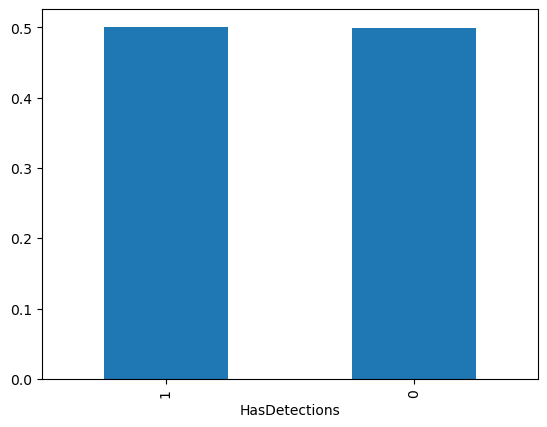

In [20]:
df[TARGET].value_counts(normalize = True).plot(kind = 'bar'); # Gráfico de barras.

Observamos que el porcentaje de infección es del 50%. Esto implica que la distribución del target está **balanceada**. 

### Visualización por tipos

Filtramos las columnas por tipo de dato para su mejor visualización...

In [21]:
df.select_dtypes(include='number').T

0         1       \
IsBeta                                             0.000000e+00       0.0   
RtpStateBitfield                                   7.000000e+00       7.0   
IsSxsPassiveMode                                   0.000000e+00       0.0   
DefaultBrowsersIdentifier                                   NaN       NaN   
AVProductStatesIdentifier                          5.344700e+04   53447.0   
AVProductsInstalled                                1.000000e+00       1.0   
AVProductsEnabled                                  1.000000e+00       1.0   
HasTpm                                             1.000000e+00       1.0   
CountryIdentifier                                  8.000000e+00     129.0   
CityIdentifier                                     8.521900e+04   54198.0   
OrganizationIdentifier                                      NaN       NaN   
GeoNameIdentifier                                  2.050000e+02     126.0   
LocaleEnglishNameIdentifier                        1.720000e+02     124.0   
OsBuild                                            1.713400e+04   17134.0   
OsSuite                                            2.560000e+02     256.0   
IsProtected                                        1.000000e+00       1.0   
AutoSampleOptIn                                    0.000000e+00       0.0   
SMode                                              0.000000e+00       0.0   
IeVerIdentifier                                    1.370000e+02     137.0   
Firewall                                           1.000000e+00       1.0   
UacLuaenable                                       1.000000e+00       1.0   
Census_OEMNameIdentifier                           1.443000e+03    2102.0   
Census_OEMModelIdentifier                          2.758910e+05  248850.0   
Census_ProcessorCoreCount                          4.000000e+00       4.0   
Census_ProcessorManufacturerIdentifier             5.000000e+00       5.0   
Census_ProcessorModelIdentifier                    2.273000e+03    2660.0   
Census_PrimaryDiskTotalCapacity                    9.538690e+05  476940.0   
Census_SystemVolumeTotalCapacity                   9.528380e+05  457600.0   
Census_HasOpticalDiskDrive                         0.000000e+00       0.0   
Census_TotalPhysicalRAM                            8.192000e+03    8192.0   
Census_InternalPrimaryDiagonalDisplaySizeInInches  2.300000e+01      13.2   
Census_InternalPrimaryDisplayResolutionHorizontal  1.920000e+03    1280.0   
Census_InternalPrimaryDisplayResolutionVertical    1.080000e+03     720.0   
Census_InternalBatteryNumberOfCharges              4.294967e+09       0.0   
Census_OSBuildNumber                               1.713400e+04   17134.0   
Census_OSBuildRevision                             1.650000e+02     165.0   
Census_OSInstallLanguageIdentifier                 2.700000e+01      18.0   
Census_OSUILocaleIdentifier                        1.200000e+02      72.0   
Census_IsPortableOperatingSystem                   0.000000e+00       0.0   
Census_IsFlightingInternal                                  NaN       NaN   
Census_IsFlightsDisabled                           0.000000e+00       0.0   
Census_ThresholdOptIn                                       NaN       0.0   
Census_FirmwareManufacturerIdentifier              3.550000e+02     486.0   
Census_FirmwareVersionIdentifier                   1.995100e+04   48753.0   
Census_IsSecureBootEnabled                         0.000000e+00       0.0   
Census_IsWIMBootEnabled                                     NaN       0.0   
Census_IsVirtualDevice                             0.000000e+00       0.0   
Census_IsTouchEnabled                              0.000000e+00       0.0   
Census_IsPenCapable                                0.000000e+00       0.0   
Census_IsAlwaysOnAlwaysConnectedCapable            0.000000e+00       0.0   
Wdft_IsGamer                                       0.000000e+00       1.0   
Wdft_RegionIdentifier                              1.

In [22]:
df.select_dtypes(include='category').T

0       \
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15100.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1234.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                             Pro   
PuaMode                                                                NaN   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                              Desktop   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  NaN   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            AllinOne   
Census_PowerPlatformRoleName                                       Desktop   
Census_InternalBatteryType                                             NaN   
Census_OSVersion                                            10.0.17134.165   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                              Professional   
Census_OSSkuName                                              PROFESSIONAL   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            OEM:DM   
Census_FlightRing                                                   Retail   

                                                                    1       \
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15100.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1282.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                             Pro   
PuaMode                                                                NaN   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  NaN   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.165   
Census_OSArchitecture                                                amd64   
Census_OSBr

## 2. Preprocesamiento 1

In [23]:
# Creación de un modelo base mediante una copia del df original
df_baseline = df.copy()
# En esta primera iteración, borramos la columnas anteriormente analizadas y declaradas como irrelevantes, con el objetivo de reducir la dimensionalidad
df_baseline = df_baseline.drop(columns=irrelevant_subjectives_variables)
# Eliminamos las columnas con un porcentaje de nulos igual o superior al valor dado
df_baseline = remove_nulls(df_baseline, 0.90)
# Imputamos el resto de Nan(numéricos a '-1' y categóricos a 'UNKNOWN)
df_baseline = impute_nulls(df_baseline)
# Comprobamos que ya no quedan nulos en el df_baseline
assert not df_baseline.isnull().values.any(), "Hay valores nulos en el df_baseline"

### Correlación de variables con el target

In [24]:
# Sacamos una tabla de correlación lineal de las variables numéricas con el target.
numeric_cols = df_baseline.select_dtypes(include='number')
corr_table=numeric_cols.corr()
corr_table

IsBeta  RtpStateBitfield  \
IsBeta                                      NaN               NaN   
RtpStateBitfield                            NaN          1.000000   
IsSxsPassiveMode                            NaN         -0.802094   
AVProductStatesIdentifier                   NaN          0.102872   
AVProductsInstalled                         NaN         -0.164852   
AVProductsEnabled                           NaN          0.008503   
HasTpm                                      NaN         -0.002677   
OrganizationIdentifier                      NaN         -0.004163   
OsBuild                                     NaN         -0.012843   
OsSuite                                     NaN         -0.010201   
IsProtected                                 NaN          0.062268   
SMode                                       NaN          0.002851   
IeVerIdentifier                             NaN         -0.021913   
Firewall                                    NaN         -0.001145   
UacLuaenable                                NaN          0.006362   
Census_OEMNameIdentifier                    NaN          0.006907   
Census_OEMModelIdentifier                   NaN          0.001674   
Census_OSBuildNumber                        NaN         -0.020372   
Census_OSBuildRevision                      NaN          0.016373   
Census_IsFlightingInternal                  NaN         -0.006543   
Census_IsFlightsDisabled                    NaN         -0.000242   
Census_ThresholdOptIn                       NaN          0.001732   
Census_FirmwareManufacturerIdentifier       NaN          0.006645   
Census_FirmwareVersionIdentifier            NaN          0.003120   
Census_IsSecureBootEnabled                  NaN         -0.015785   
Census_IsWIMBootEnabled                     NaN          0.001349   
Census_IsVirtualDevice                      NaN          0.013733   
Census_IsTouchEnabled                       NaN          0.011436   
Census_IsPenCapable                         NaN          0.006414   
Census_IsAlwaysOnAlwaysConnectedCapable     NaN          0.016498   
Wdft_IsGamer                                NaN         -0.014883   
Wdft_RegionIdentifier                       NaN          0.000395   
HasDetections                               NaN          0.037321   

                                         IsSxsPassiveMode  \
IsBeta                                                NaN   
RtpStateBitfield                                -0.802094   
IsSxsPassiveMode                                 1.000000   
AVProductStatesIdentifier                       -0.112694   
AVProductsInstalled                              0.187734   
AVProductsEnabled                                0.024123   
HasTpm                                           0.013799   
OrganizationIdentifier                           0.003778   
OsBuild                                          0.045667   
OsSuite                                          0.016325   
IsProtected                                     -0.027455   
SMode                                           -0.003746   
IeVerIdentifier                                 -0.005485   
Firewall                                         0.009879   
UacLuaenable                                    -0.003388   
Census_OEMNameIdentifier                        -0.006711   
Census_OEMModelIdentifier                       -0.000299   
Census_OSBuildNumber                             0.044022   
Census_OSBuildRevision                          -0.023712   
Census_IsFlightingInternal                      -0.003307   
Census_IsFlightsDisabled                         0.015320   
Census_ThresholdOptIn                           -0.011170   
Census_FirmwareManufacturerIdentifier           -0.007792   
Census_FirmwareVersionIdentifier                -0.004648   
Census_IsSecureBootEnabled                       0.020830   
Census_IsWIMBootEnabled                         -0.010764   
Census_IsVirtualDevice                         

In [25]:
# Filtramos la columna específica de correlación con el target.
df_corr_target= pd.DataFrame(corr_table.iloc[:,-1]).sort_values(by=TARGET)
df_corr_target

HasDetections
AVProductsInstalled                          -0.137023
Census_IsAlwaysOnAlwaysConnectedCapable      -0.060470
Census_IsVirtualDevice                       -0.044737
Census_IsTouchEnabled                        -0.041240
IsSxsPassiveMode                             -0.034447
AVProductsEnabled                            -0.023980
Wdft_RegionIdentifier                        -0.021179
OsSuite                                      -0.019974
Census_FirmwareManufacturerIdentifier        -0.019376
Census_IsPenCapable                          -0.017156
Census_IsWIMBootEnabled                      -0.013135
Census_ThresholdOptIn                        -0.013073
Census_IsFlightingInternal                   -0.012780
Census_OEMNameIdentifier                     -0.012415
Census_OSBuildRevision                       -0.010580
Census_IsSecureBootEnabled                   -0.002060
Census_OEMModelIdentifier                    -0.001640
Census_IsFlightsDisabled                     -0.000515
UacLuaenable                                  0.003394
Firewall                                      0.004686
OrganizationIdentifier                        0.005083
Census_FirmwareVersionIdentifier              0.006092
HasTpm                                        0.007742
IeVerIdentifier                               0.015606
OsBuild                                       0.024810
Census_OSBuildNumber                          0.030053
RtpStateBitfield                              0.037321
SMode                                         0.040816
Wdft_IsGamer                                  0.048592
IsProtected                                   0.055343
AVProductStatesIdentifier                     0.114750
HasDetections                                 1.000000
IsBeta                                             NaN

Observamos que no existen fuertes correlaciones lineales entre las variables numéricas con el target. Quizás sería más apropiado utilizar una métrica que no mida las correlaciones lineales.

También podemos ver que la relación más fuerte es con la variable *AvProductInstalled*. Tiene sentido ya que esta se refiere a la cantidad de antivirus instalados.

### Reducción de la dimensionalidad

Creamos un df con las variables categóricas para poder observar la varianza entre ellas. El objetivo es reducir aún más la dimensionalidad del *df_baseline*, eliminando aquellas variables que tengan en una sola categoría una proporción muy alta. 

In [26]:
df_baseline_categoric = pd.DataFrame(df_baseline, columns=get_categoric_cols(df_baseline))
df_baseline_categoric.head()

ProductName EngineVersion       AppVersion  AvSigVersion   Platform  \
0  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1234.0  windows10   
1  win8defender   1.1.15100.1  4.18.1807.18075  1.273.1282.0  windows10   
2  win8defender   1.1.15100.1   4.9.10586.1106   1.273.781.0  windows10   
3  win8defender   1.1.15200.1  4.18.1807.18075  1.275.1639.0  windows10   
4  win8defender   1.1.15200.1  4.18.1807.18075   1.275.511.0  windows10   

  Processor     OsVer OsPlatformSubRelease  \
0       x64  10.0.0.0                  rs4   
1       x64  10.0.0.0                  rs4   
2       x64  10.0.0.0                  th2   
3       x64  10.0.0.0                  rs4   
4       x64  10.0.0.0                  rs4   

                                        OsBuildLab SkuEdition  ...  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro  ...   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro  ...   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home  ...   
3         17134.1.amd64fre.rs4_release.180410-1804       Home  ...   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro  ...   

  Census_PowerPlatformRoleName Census_OSVersion Census_OSArchitecture  \
0                      Desktop   10.0.17134.165                 amd64   
1                       Mobile   10.0.17134.165                 amd64   
2                       Mobile  10.0.10586.1176                 amd64   
3                       Mobile   10.0.17134.286                 amd64   
4                       Mobile   10.0.17134.228                 amd64   

   Census_OSBranch Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
0      rs4_release     Professional     PROFESSIONAL               UUPUpgrade   
1      rs4_release     Professional     PROFESSIONAL               UUPUpgrade   
2  th2_release_sec             Core             CORE                   Update   
3      rs4_release             Core             CORE                 IBSClean   
4      rs4_release     Professional     PROFESSIONAL                   Update   

  Census_GenuineStateName Census_ActivationChannel Census_FlightRing  
0              IS_GENUINE                   OEM:DM            Retail  
1              IS_GENUINE                   OEM:DM            Retail  
2              IS_GENUINE                   Retail            Retail  
3              IS_GENUINE                   Retail            Retail  
4              IS_GENUINE                   OEM:DM            Retail  

[5 rows x 23 columns]

Vamos a realizar una tabla en la que podamos visualizar la proporción de cada categoría por cada una de las variables categóricas. Poniendo el límite en 10 categorías. Así, analizaremos cuales de ellas concentran mayor porcentaje de observaciones en una sola categoría.

In [27]:
results = []
# Iteramos sobre las columnas del DataFrame
for col in df_baseline_categoric.columns:
    # Calculamos las proporciones de cada categoría
    proporciones = df_baseline_categoric[col].value_counts(normalize=True)
    # Almacenamos los nombres de las columnas y los 10 primeros porcentajes
    results.append([col] + list(proporciones.head(10)))
# Creamos un DataFrame con los resultados
df_categoric_class = pd.DataFrame(results, columns=['Columna', 'Clase_1', 'Clase_2', 'Clase_3', 'Clase_4', 'Clase_5', 'Clase_6', 'Clase_7', 'Clase_8', 'Clase_9', 'Clase_10'])
# Ordenamos en orden descendente la proporción de categorías
df_categoric_class.sort_values(by='Clase_1',ascending=False)


Columna   Clase_1   Clase_2   Clase_3   Clase_4  \
12           Census_DeviceFamily  0.998380  0.001615  0.000005  0.000000   
0                    ProductName  0.989065  0.010935  0.000000       NaN   
6                          OsVer  0.967875  0.021285  0.010680  0.000090   
4                       Platform  0.966340  0.021285  0.010770  0.001605   
22             Census_FlightRing  0.935940  0.032055  0.028070  0.001245   
15         Census_OSArchitecture  0.908175  0.091810  0.000015  0.000000   
5                      Processor  0.908020  0.091965  0.000015  0.000000   
20       Census_GenuineStateName  0.882520  0.090335  0.025570  0.001575   
13  Census_PowerPlatformRoleName  0.691590  0.232800  0.055055  0.012560   
11         Census_MDC2FormFactor  0.640065  0.220145  0.045665  0.033330   
9                     SkuEdition  0.616565  0.362425  0.008980  0.004640   
2                     AppVersion  0.579180  0.095040  0.040315  0.030285   
21      Census_ActivationChannel  0.529890  0.382395  0.050325  0.036015   
10                   SmartScreen  0.483860  0.357295  0.116430  0.020565   
16               Census_OSBranch  0.453115  0.138415  0.134110  0.088045   
7           OsPlatformSubRelease  0.442300  0.280010  0.086290  0.081455   
1                  EngineVersion  0.434040  0.411115  0.029085  0.023745   
8                     OsBuildLab  0.413465  0.139780  0.107095  0.079420   
17              Census_OSEdition  0.389045  0.351795  0.216765  0.018615   
18              Census_OSSkuName  0.389045  0.358290  0.216715  0.018580   
19      Census_OSInstallTypeName  0.293435  0.185155  0.177245  0.140450   
14              Census_OSVersion  0.160860  0.101210  0.060675  0.052340   
3                   AvSigVersion  0.011600  0.010960  0.010675  0.010430   

     Clase_5   Clase_6   Clase_7   Clase_8   Clase_9  Clase_10  
12       NaN       NaN       NaN       NaN       NaN       NaN  
0        NaN       NaN       NaN       NaN       NaN       NaN  
6   0.000025  0.000010  0.000005  0.000005  0.000005  0.000005  
4   0.000000       NaN       NaN       NaN       NaN       NaN  
22  0.001130  0.001095  0.000460  0.000005  0.000000       NaN  
15       NaN       NaN       NaN       NaN       NaN       NaN  
5        NaN       NaN       NaN       NaN       NaN       NaN  
20       NaN       NaN       NaN       NaN       NaN       NaN  
13  0.004360  0.002320  0.000865  0.000445  0.000005       NaN  
11  0.032810  0.015440  0.007510  0.003565  0.001000  0.000365  
9   0.003875  0.002485  0.000620  0.000410  0.000000       NaN  
2   0.028935  0.026050  0.025350  0.023105  0.022895  0.021140  
21  0.000965  0.000410  0.000000       NaN       NaN       NaN  
10  0.015055  0.003880  0.002625  0.000115  0.000115  0.000025  
16  0.087450  0.035785  0.029745  0.021810  0.008435  0.001705  
7   0.045465  0.030110  0.021285  0.010770  0.002315  0.000000  
1   0.017650  0.015250  0.013825  0.010525  0.007895  0.007560  
8   0.028820  0.026670  0.021535  0.019170  0.016770  0.006870  
17  0.006400  0.004585  0.004025  0.003275  0.002410  0.001165  
18  0.004590  0.004025  0.003295  0.002410  0.001165  0.000670  
19  0.093990  0.072905  0.023180  0.007625  0.006015  0.000000  
14  0.039280  0.038440  0.035990  0.025775  0.024895  0.024775  
3   0.009610  0.009540  0.008855  0.008510  0.007575  0.007375

En esta tabla podemos observar variables muy **sesgadas** que podrían producir un sobreajuste. Esto puede llevar a un modelo que no generaliza bien a nuevos datos y no es útil para hacer predicciones en situaciones distintas a las del conjunto de entrenamiento. Decidimos por ello eliminarlas y reducir la dimensionalidad a la hora de aplicar el *One Hot Encoding*.

In [28]:
# Llamamos a la función para eliminar las columnas con una proporción del 90% en una sola categoría
df_baseline = remove_cols_by_percentage(df_baseline, 0.90)
# Comprobamos con cuántas columnas contamos ahora mismo
print(df_baseline.shape)

(200000, 50)


### Categorical encoding

In [29]:
# Actualizamos las columnas categóricas que nos quedan
categoric_cols = get_categoric_cols(df_baseline)
# Las revisamos
categoric_cols

['EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [30]:
# Llamamos a la función de OHE con 6 máximas categorías
df_baseline = apply_one_hot_encoding(df_baseline, 6)
# Visualizamos que después de aplicar OHE obtenemos 127 columnas
df_baseline.head()

IsBeta  RtpStateBitfield  IsSxsPassiveMode  AVProductStatesIdentifier  \
0       0               7.0                 0                    53447.0   
1       0               7.0                 0                    53447.0   
2       0               7.0                 0                    46781.0   
3       0               7.0                 0                    53447.0   
4       0               7.0                 0                    47238.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  OrganizationIdentifier  \
0                  1.0                1.0       1                    -1.0   
1                  1.0                1.0       1                    -1.0   
2                  2.0                1.0       1                    27.0   
3                  1.0                1.0       1                    27.0   
4                  2.0                1.0       1                    27.0   

   OsBuild  OsSuite  ...  Census_GenuineStateName_INVALID_LICENSE  \
0    17134      256  ...                                      0.0   
1    17134      256  ...                                      0.0   
2    10586      768  ...                                      0.0   
3    17134      768  ...                                      0.0   
4    17134      256  ...                                      0.0   

   Census_GenuineStateName_IS_GENUINE  Census_GenuineStateName_OFFLINE  \
0                                 1.0                              0.0   
1                                 1.0                              0.0   
2                                 1.0                              0.0   
3                                 1.0                              0.0   
4                                 1.0                              0.0   

   Census_GenuineStateName_UNKNOWN  Census_ActivationChannel_OEM:DM  \
0                              0.0                              1.0   
1                              0.0                              1.0   
2                              0.0                              0.0   
3                              0.0                              0.0   
4                              0.0                              1.0   

   Census_ActivationChannel_OEM:NONSLP  Census_ActivationChannel_Retail  \
0                                  0.0                              0.0   
1                                  0.0                              0.0   
2                                  0.0                              1.0   
3                                  0.0                              1.0   
4                                  0.0                              0.0   

   Census_ActivationChannel_Volume:GVLK  Census_ActivationChannel_Volume:MAK  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

   Census_ActivationChannel_infrequent_sklearn  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          0.0  
4                                          0.0  

[5 rows x 127 columns]

### Dividimos en train y test

In [31]:
# Llamamos a la función de train y test
X_train, X_test, y_train, y_test = apply_train_test(df_baseline)
# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  160000
- Test:   40000


## Entrenamiento y evaluación 1

In [32]:
# Creamos una tabla para valorar las métricas de cada modelo en las 3 iteraciones que vamos a realizar
tabla_metricas = pd.DataFrame(columns = ['iteracion', 'modelo', 'metrica', 'valor'])

In [33]:
# Instanciamos el modelo añadiendo máxima profundida de 10
clf= DecisionTreeClassifier(max_depth=10)
# Entrenamos el modelo
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=10)

In [34]:
# Obtención de predicciones sobre test
y_pred = clf.predict(X_test)
print("Predicciones:", y_pred[0:20])
print("Datos reales:", y_test[0:20])

# Evaluación de la precisión del modelo
success = (y_pred == y_test)
print("Número de aciertos:", success.sum())
print("Total de predicciones:", len(success))
print("Ratio de acierto (Número de aciertos / Total de predicciones):", success.mean().round(2))

Predicciones: [1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0]
Datos reales: [1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0]
Número de aciertos: 24794
Total de predicciones: 40000
Ratio de acierto (Número de aciertos / Total de predicciones): 0.62


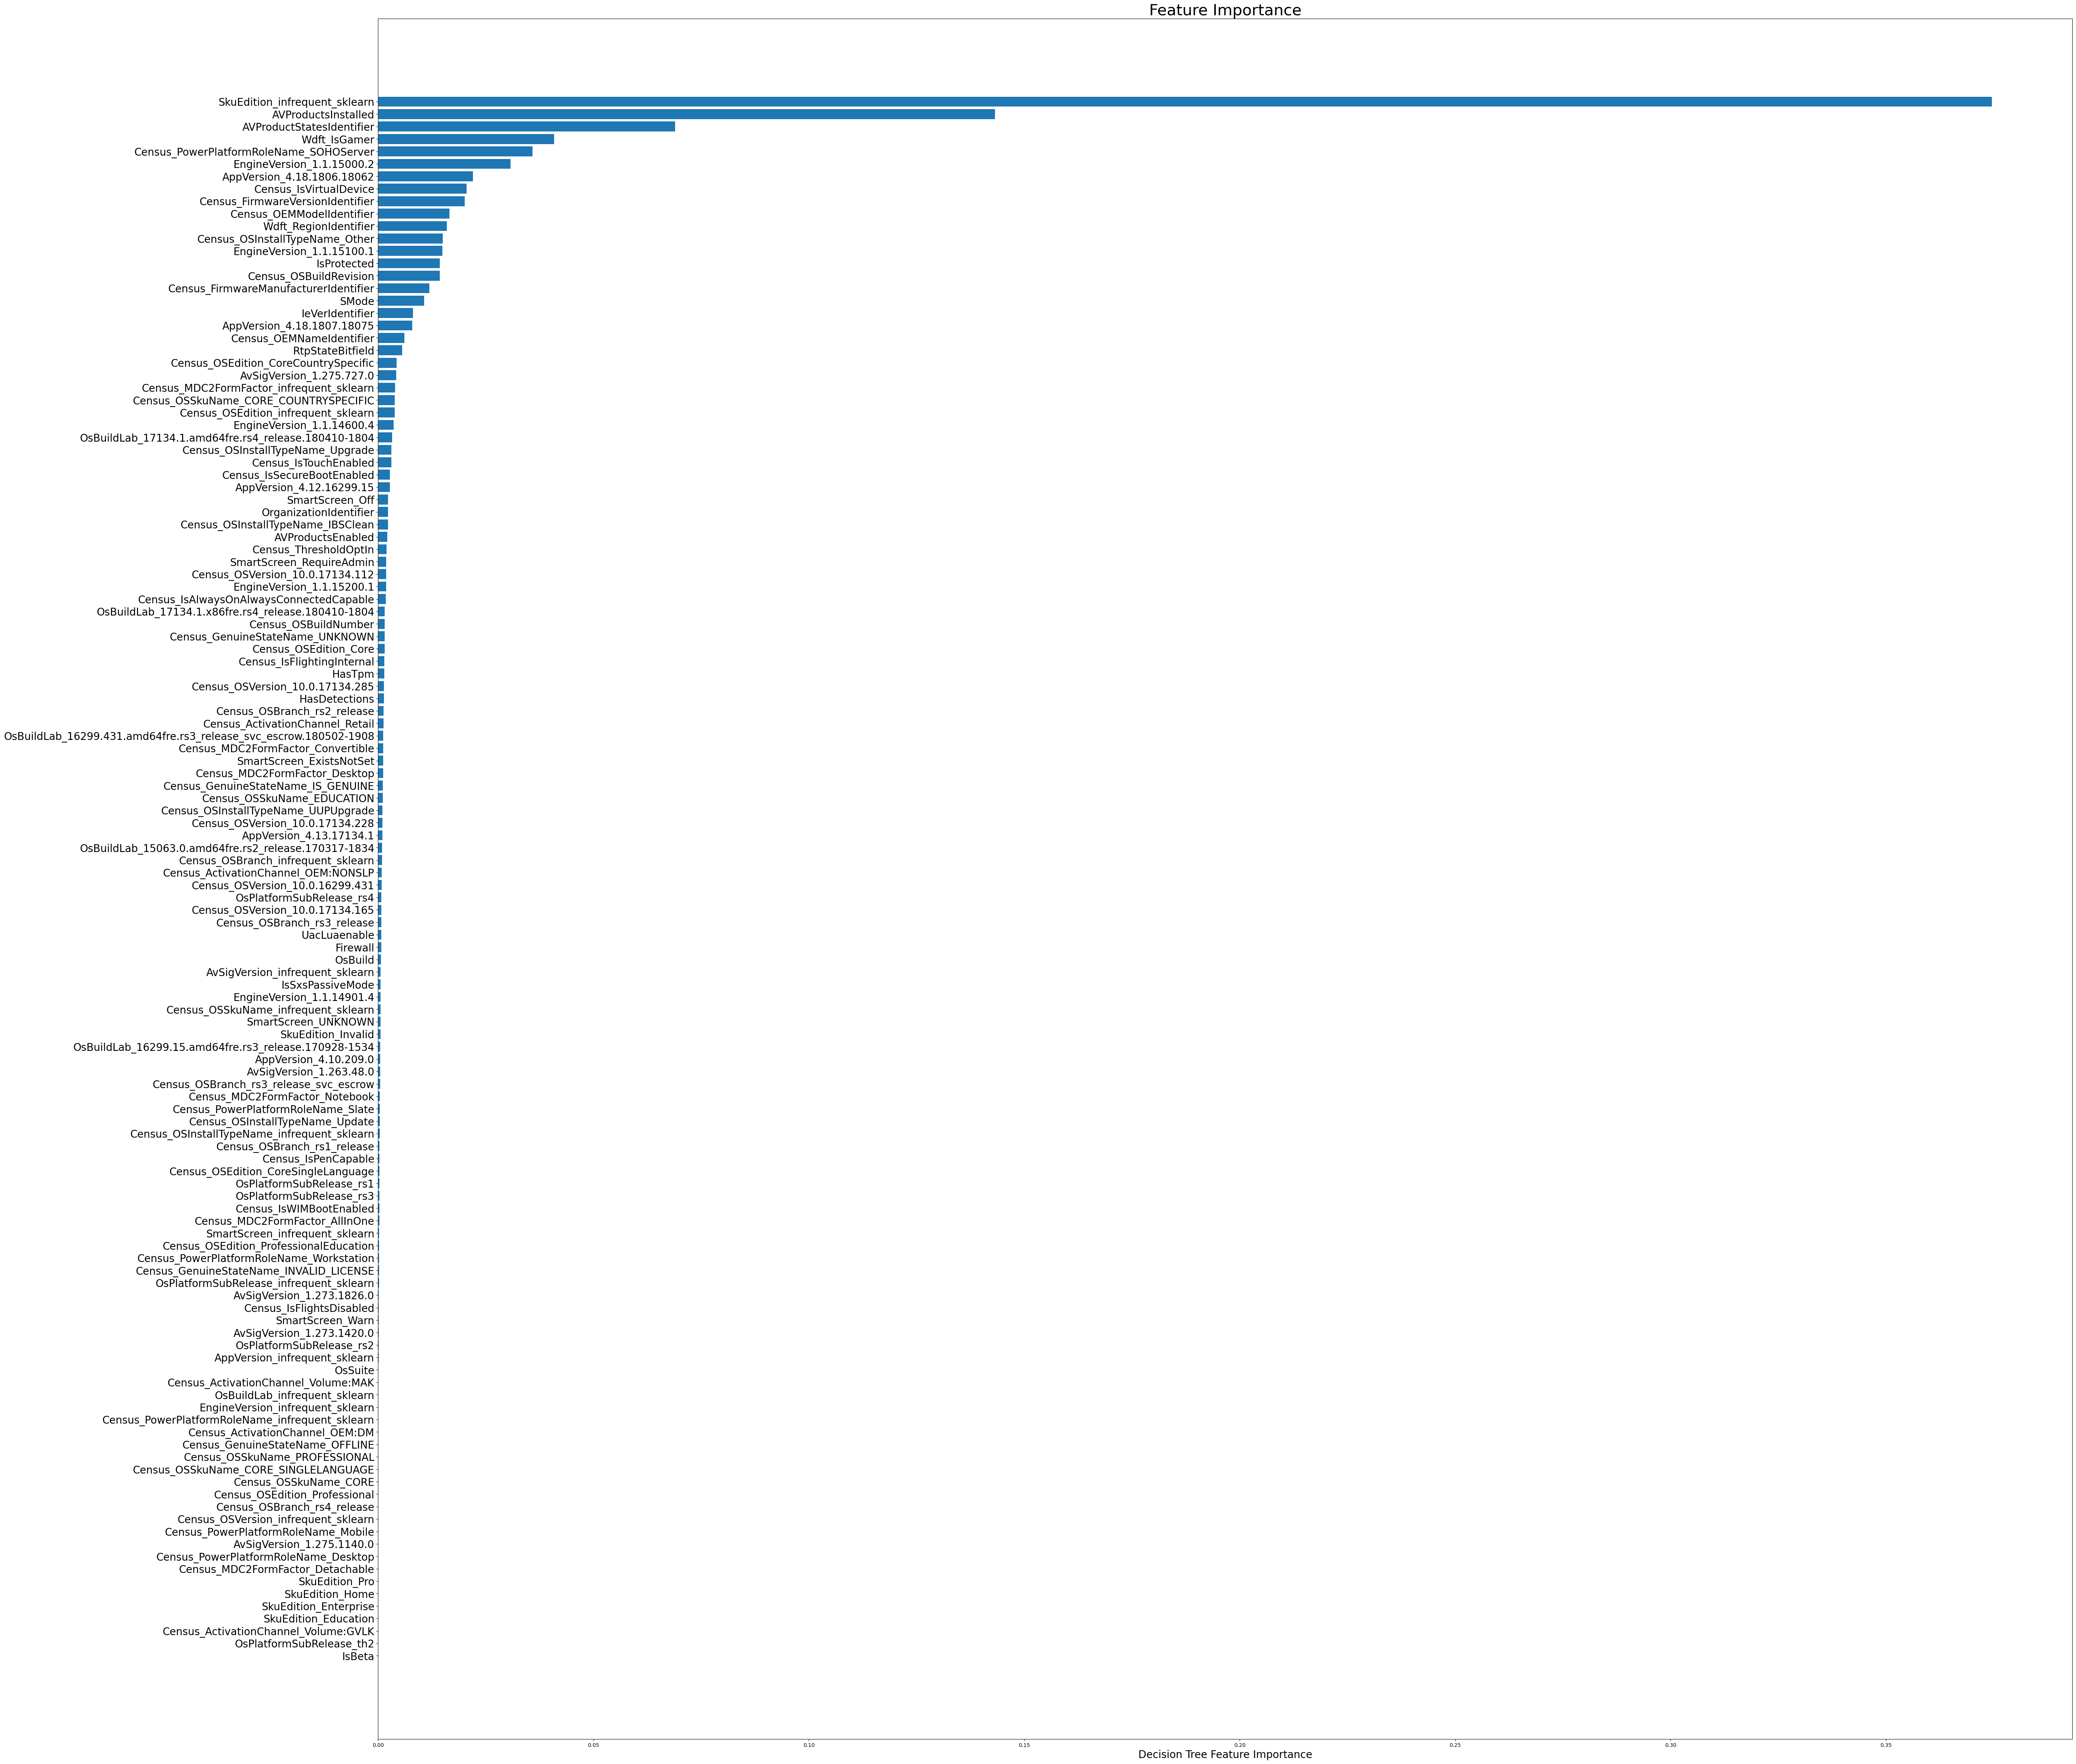

In [35]:
#Visualizamos la gráfica de feature importances con las variables más relevantes
def show_features_importance_graph(df, clf):
    plt.figure(figsize=(70,60))
    importance = clf.feature_importances_
    idxs = np.argsort(importance)
    plt.title("Feature Importance", fontsize=30)
    plt.barh(range(len(idxs)),importance[idxs],align="center")
    plt.yticks(range(len(idxs)),[df.columns[i] for i in idxs], fontsize=20)
    plt.xticks(rotation=0)
    plt.subplots_adjust(left=0.25)
    plt.xlabel("Decision Tree Feature Importance", fontsize=20)
    plt.show()

show_features_importance_graph(df_baseline, clf)


Observamos que una de las variables más relevantes es *AVProductsInstalled*. Tiene sentido ya que esta corresponde al número de antivirus instalados.

In [36]:
# Obtenemos el accuracy de Decision Tree en la primera iteración
baseline_dt_acc = clf.score(X_test, y_test)
print(f"El accuracy para Decision Tree es: {round(baseline_dt_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['baseline', 'DecisionTree', 'accuracy', round(baseline_dt_acc, 2)]

El accuracy para Decision Tree es: 0.62%


In [37]:
# Repetimos el mismo proceso con Gradient Boosting
gbc = GradientBoostingClassifier() 
gbc.fit(X_train, y_train)
baseline_gbc_acc = gbc.score(X_test, y_test)
print(f"El accuracy para Gbc es: {round(baseline_gbc_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['baseline', 'Gboost', 'accuracy', round(baseline_gbc_acc, 2)]

El accuracy para Gbc es: 0.63%


In [38]:
# Repetimos por último lo mismo con XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
baseline_xgb_acc = xgboost.score(X_test, y_test)
print(f"El accuracy para XGboost es: {round(baseline_xgb_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['baseline', 'XGBoost', 'accuracy', round(baseline_xgb_acc, 2)]

El accuracy para XGboost es: 0.64%


In [39]:
# Obtenemos el accuracy de los diferentes modelos en esta primera iteración
tabla_metricas

iteracion        modelo   metrica  valor
0  baseline  DecisionTree  accuracy   0.62
1  baseline        Gboost  accuracy   0.63
2  baseline       XGBoost  accuracy   0.64

## 3. Preprocesamiento 2

In [40]:
# Creación de un modelo mediante una copia del df original
df_2 = df.copy()
# En esta segunda iteración vamos a dejar las columnas consideradas irrelevantes anteriormente por si pudieran influir en el modelo
# df_baseline = df_baseline.drop(columns=irrelevant_subjectives_variables)
# Eliminamos las columnas con nulos (ahora con una proporción superior al 45%), con el objetivo de añadir variables nuevas que puedan aportar información
df_2 = remove_nulls(df_2, 0.6)
# Imputamos los nulos restantes de las columnas categóricas con la moda en vez de con 'UNKNOWN' por si favorece
df_2 = replace_categoric_nulls_with_moda(df_2)
# Imputamos los nulos restantes de las columnas numéricas con la mediana, en lugar de con un valor fuera de rango
df_2 = replace_numeric_nulls_with_median(df_2)
# Eliminamos las columnas categóricas con categorías de una proporción igual o superior al 95%
df_2 = remove_cols_by_percentage(df_2, 0.95)

# Comprobamos que no hay nulos en el df_2
assert not df_2.isnull().values.any(), "Hay valores nulos en el df_baseline"

In [41]:
# OHE con 2 máximas categorías
df_2 = apply_one_hot_encoding(df_2, 2)
# Visualizamos que después de aplicar OHE obtenemos 92 columnas
df_2.head()

IsBeta  RtpStateBitfield  IsSxsPassiveMode  AVProductStatesIdentifier  \
0       0               7.0                 0                    53447.0   
1       0               7.0                 0                    53447.0   
2       0               7.0                 0                    46781.0   
3       0               7.0                 0                    53447.0   
4       0               7.0                 0                    47238.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  CountryIdentifier  \
0                  1.0                1.0       1                  8   
1                  1.0                1.0       1                129   
2                  2.0                1.0       1                149   
3                  1.0                1.0       1                164   
4                  2.0                1.0       1                207   

   CityIdentifier  OrganizationIdentifier  ...  \
0         85219.0                    27.0  ...   
1         54198.0                    27.0  ...   
2        122689.0                    27.0  ...   
3        114587.0                    27.0  ...   
4         72421.0                    27.0  ...   

   Census_OSInstallTypeName_UUPUpgrade  \
0                                  1.0   
1                                  1.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   Census_OSInstallTypeName_infrequent_sklearn  \
0                                          0.0   
1                                          0.0   
2                                          1.0   
3                                          1.0   
4                                          1.0   

   Census_OSWUAutoUpdateOptionsName_FullAuto  \
0                                        1.0   
1                                        1.0   
2                                        0.0   
3                                        1.0   
4                                        1.0   

   Census_OSWUAutoUpdateOptionsName_infrequent_sklearn  \
0                                                0.0     
1                                                0.0     
2                                                1.0     
3                                                0.0     
4                                                0.0     

   Census_GenuineStateName_IS_GENUINE  \
0                                 1.0   
1                                 1.0   
2                                 1.0   
3                                 1.0   
4                                 1.0   

   Census_GenuineStateName_infrequent_sklearn  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Census_ActivationChannel_Retail  \
0                              0.0   
1                              0.0   
2                              1.0   
3                              1.0   
4                              0.0   

   Census_ActivationChannel_infrequent_sklearn  Census_FlightRing_Retail  \
0                                          1.0                       1.0   
1                                          1.0                       1.0   
2                                          0.0                       1.0   
3                                          0.0                       1.0   
4                                          1.0                       1.0   

   Census_FlightRing_infrequent_sklearn  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  

[5 rows x 93 columns]

In [42]:
# Llamamos a la función de train y test
X_train, X_test, y_train, y_test = apply_train_test(df_2)
# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  160000
- Test:   40000


### Entrenamiento y evaluación 2

In [43]:
# Instanciamos el modelo añadiendo máxima profundidad de 5
clf= DecisionTreeClassifier(max_depth=5)
# Lo entrenamos
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
# Obtención de predicciones sobre test
y_pred = clf.predict(X_test)
print("Predicciones:", y_pred[0:20])
print("Datos reales:", y_test[0:20])

# Evaluación de la precisión del modelo
success = (y_pred == y_test)
print("Número de aciertos:", success.sum())
print("Total de predicciones:", len(success))
print("Ratio de acierto (Número de aciertos / Total de predicciones):", success.mean().round(2))

Predicciones: [1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1]
Datos reales: [1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0]
Número de aciertos: 23963
Total de predicciones: 40000
Ratio de acierto (Número de aciertos / Total de predicciones): 0.6


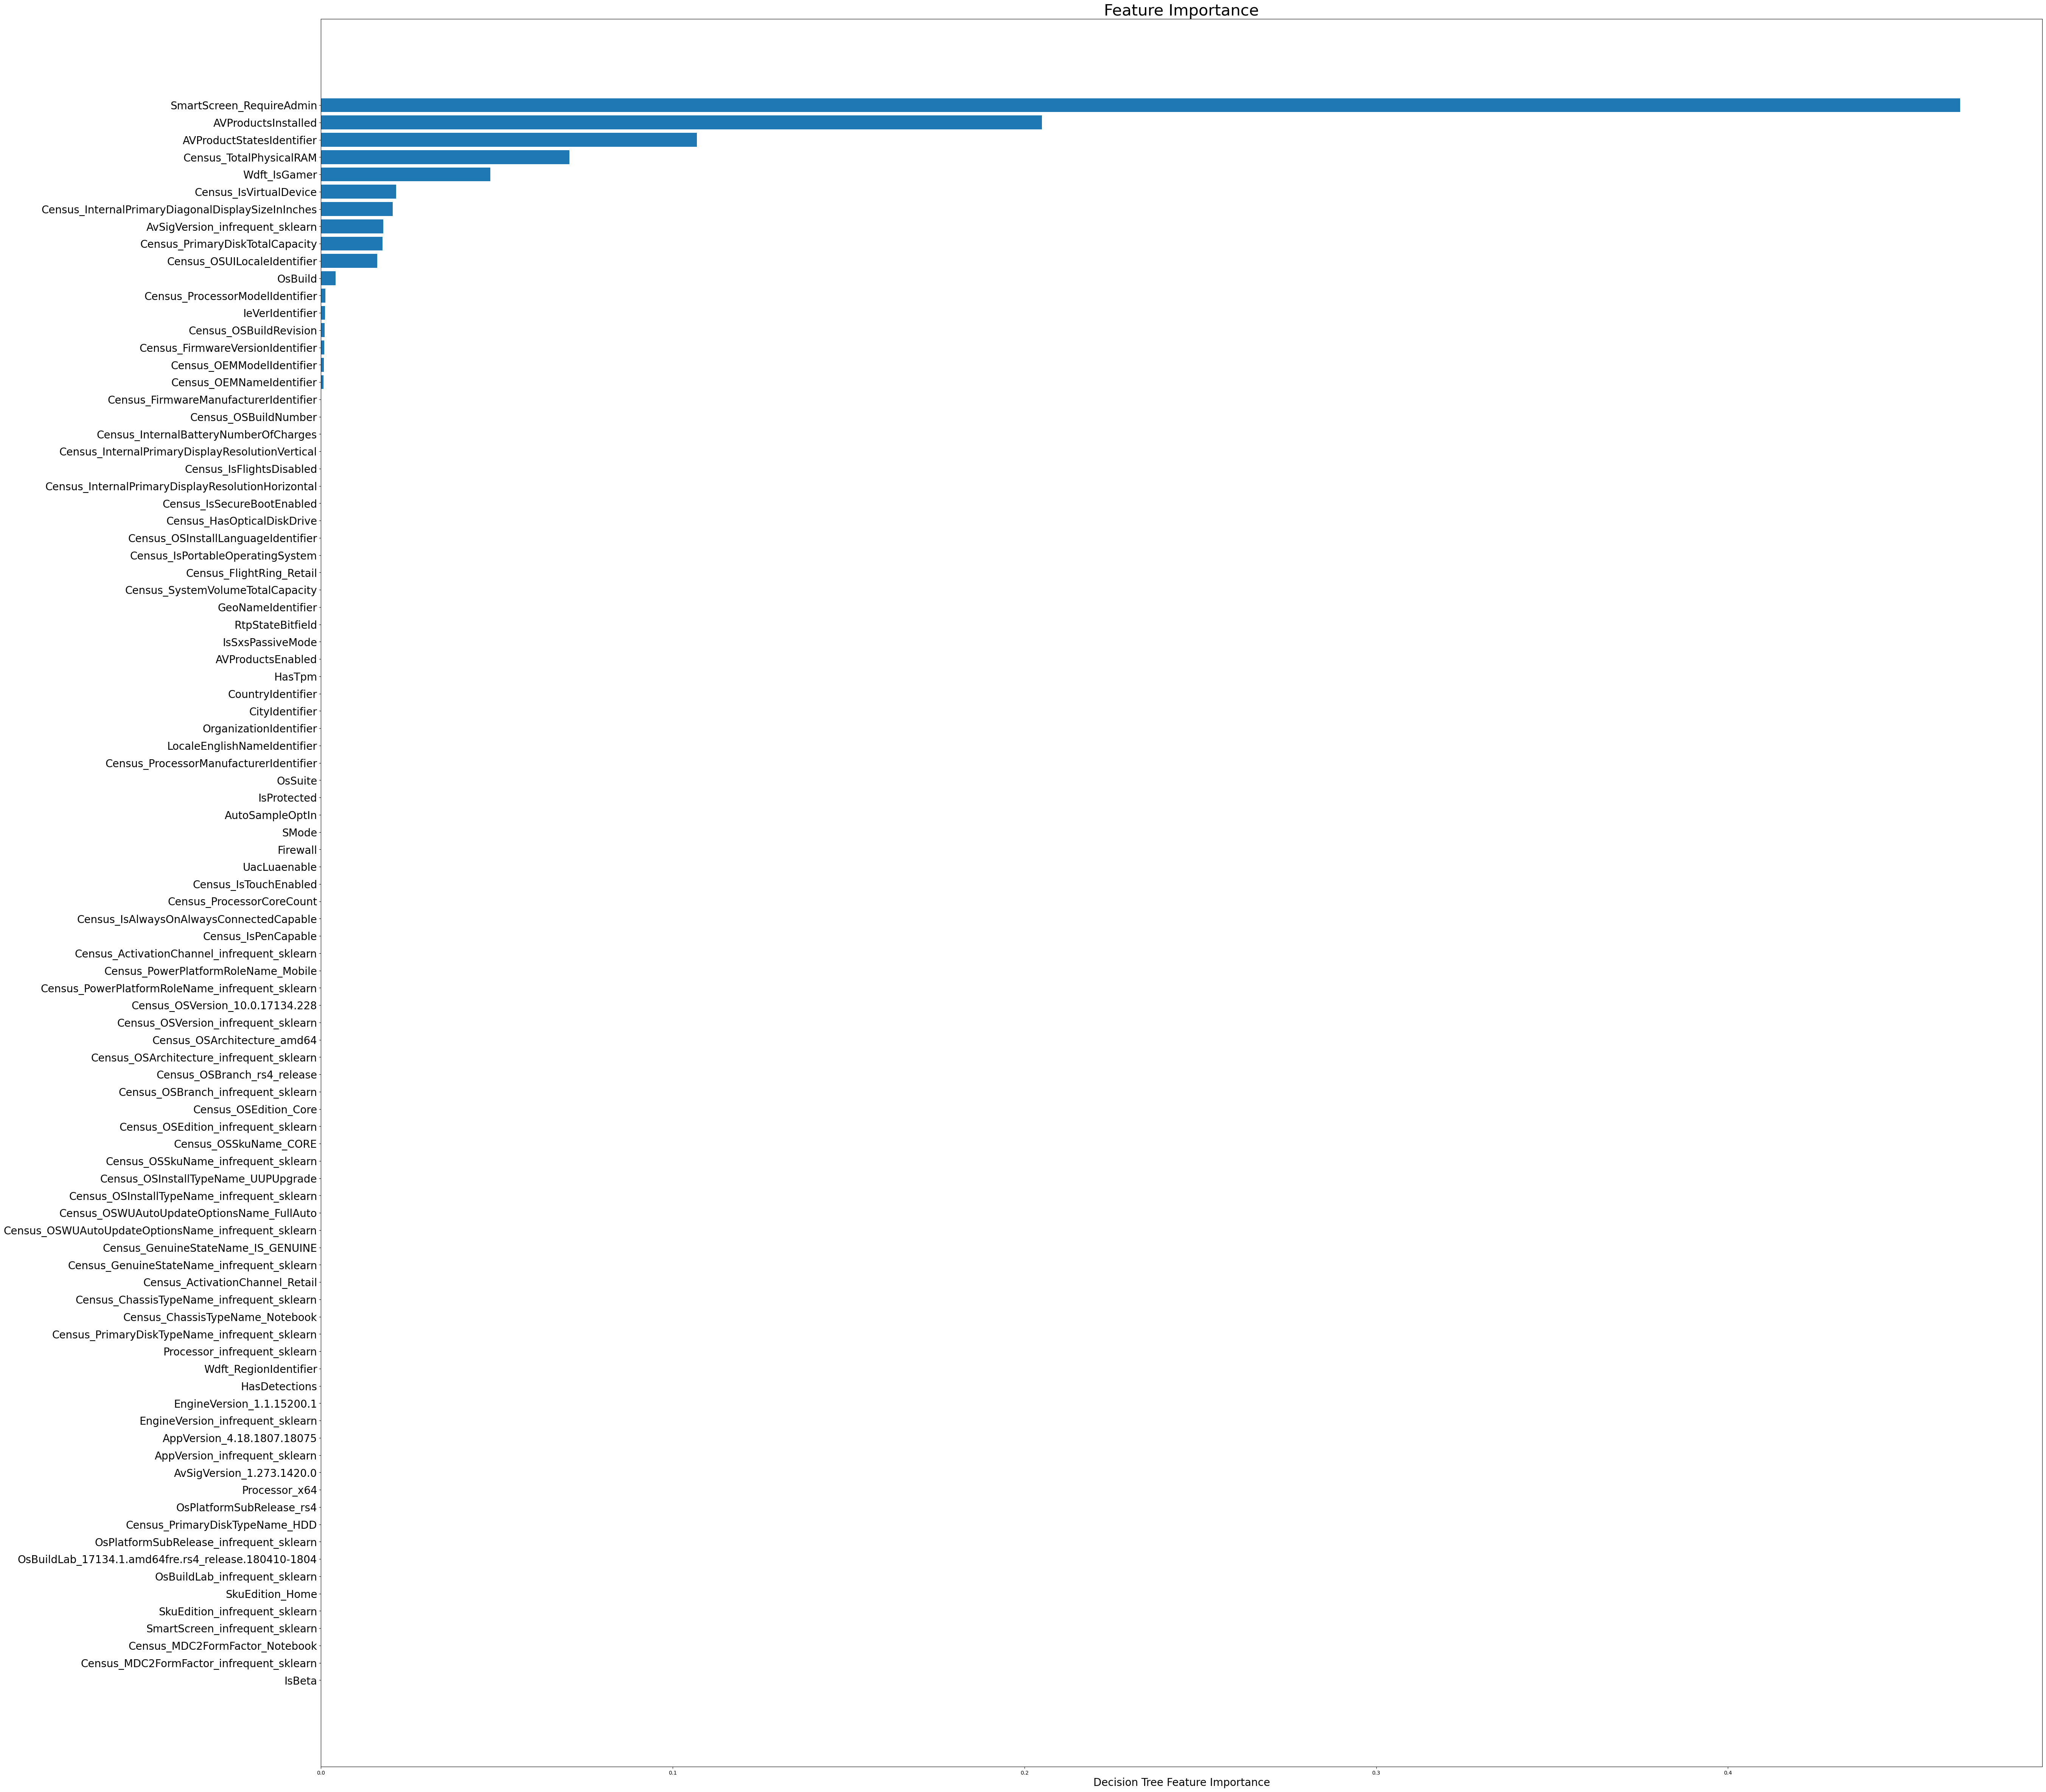

In [45]:
# Llamamos a la función de visualización de la gráfica de feature importances
show_features_importance_graph(df_2, clf)

Observamos que sigue teniendo bastante relevancia de nuevo la variable *AvProductInstalled* y cambia ahora la primera posición a *SmartScreen_RequireAdmin*.

In [46]:
# Obtenemos el accuracy de DecisionTree
it2_dt_acc = clf.score(X_test, y_test)
print(f"El accuracy para Decision Tree es: {round(it2_dt_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['2 iteracion', 'DecisionTree', 'accuracy', round(it2_dt_acc, 2)]

El accuracy para Decision Tree es: 0.6%


In [47]:
# Repetimos la segunda iteración con Gradient Boosting
gbc = GradientBoostingClassifier() 
gbc.fit(X_train, y_train)
it2_gbc_acc = gbc.score(X_test, y_test)
print(f"El accuracy para Gbc es: {round(it2_gbc_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['2 iteracion', 'Gboost', 'accuracy', round(it2_gbc_acc, 2)]

El accuracy para Gbc es: 0.63%


In [48]:
# Repetimos lo mismo con XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
it2_xgb_acc = xgboost.score(X_test, y_test)
print(f"El accuracy para XGboost es: {round(it2_xgb_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['2 iteracion', 'XGBoost', 'accuracy', round(it2_xgb_acc, 2)]

El accuracy para XGboost es: 0.63%


In [49]:
# Evaluamos las métricas de la primera y segunda iteración
tabla_metricas

iteracion        modelo   metrica  valor
0     baseline  DecisionTree  accuracy   0.62
1     baseline        Gboost  accuracy   0.63
2     baseline       XGBoost  accuracy   0.64
3  2 iteracion  DecisionTree  accuracy   0.60
4  2 iteracion        Gboost  accuracy   0.63
5  2 iteracion       XGBoost  accuracy   0.63

## 3. Preprocesamiento 3

In [50]:
# Realizamos de nuevo una copia del df original
df_3 = df.copy()

In [51]:
# En esta tercera iteración eliminamos las columnas consideradas irrelevantes de nuevo
df_3 = df_3.drop(columns=irrelevant_subjectives_variables)
df_3.head()

MachineIdentifier   ProductName EngineVersion  \
0  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    46781.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    47238.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           19951.0                           0   
1                           48753.0                           0   
2                           33111.0                           1   
3                           48473.0                           1   
4                            4343.0                           1   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice Census_IsTouchEnabled  \
0                      NaN                     0.0                     0   
1                      0.0                     0.0                     0   
2                      0.0                     0.0                     1   
3                      NaN                     0.0                     0   
4                      NaN                     0.0                     1   

  Census_IsPenCapable Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                   0                                     0.0           0.0   
1                   0                                     0.0           1.0   
2                   1                                     0.0           0.0   
3                   0                                     0.0           0.0   
4                   0                                     0.0           1.0   

   Wdft_RegionIdentifier HasDetections  
0                   11.0             1  
1                    3.0             0  
2                   15.0             0  
3                   15.0             1  
4                   13.0             1  

[5 rows x 59 columns]

In [52]:
# Eliminamos las columnas con un porcentaje de nulos superior al 70%
df_3 = remove_nulls(df_3, 0.7)
# Imputamos nulos de nuevo (numéricos con '-1' y categóricos con 'UNKNOWN')
df_3 = impute_nulls(df_3)
# Comprobamos que no hay nulos en el df_3
assert not df_3.isnull().values.any(), "Hay valores nulos en el df_baseline"
# Eliminamos columnas con una proporción máxima del 99% en una sola categoría
df_3 = remove_cols_by_percentage(df_3, 0.99)

In [53]:
# OHE con 3 máximas categorías, quedándose el df_3 en 97 columnas
df_3 = apply_one_hot_encoding(df_3, 3)
df_3.head()

IsBeta  RtpStateBitfield  IsSxsPassiveMode  AVProductStatesIdentifier  \
0       0               7.0                 0                    53447.0   
1       0               7.0                 0                    53447.0   
2       0               7.0                 0                    46781.0   
3       0               7.0                 0                    53447.0   
4       0               7.0                 0                    47238.0   

   AVProductsInstalled  AVProductsEnabled  HasTpm  OrganizationIdentifier  \
0                  1.0                1.0       1                    -1.0   
1                  1.0                1.0       1                    -1.0   
2                  2.0                1.0       1                    27.0   
3                  1.0                1.0       1                    27.0   
4                  2.0                1.0       1                    27.0   

   OsBuild  OsSuite  ...  Census_OSInstallTypeName_infrequent_sklearn  \
0    17134      256  ...                                          0.0   
1    17134      256  ...                                          0.0   
2    10586      768  ...                                          1.0   
3    17134      768  ...                                          0.0   
4    17134      256  ...                                          1.0   

   Census_GenuineStateName_INVALID_LICENSE  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   Census_GenuineStateName_IS_GENUINE  \
0                                 1.0   
1                                 1.0   
2                                 1.0   
3                                 1.0   
4                                 1.0   

   Census_GenuineStateName_infrequent_sklearn  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Census_ActivationChannel_OEM:DM  Census_ActivationChannel_Retail  \
0                              1.0                              0.0   
1                              1.0                              0.0   
2                              0.0                              1.0   
3                              0.0                              1.0   
4                              1.0                              0.0   

   Census_ActivationChannel_infrequent_sklearn  Census_FlightRing_NOT_SET  \
0                                          0.0                        0.0   
1                                          0.0                        0.0   
2                                          0.0                        0.0   
3                                          0.0                        0.0   
4                                          0.0                        0.0   

   Census_FlightRing_Retail  Census_FlightRing_infrequent_sklearn  
0                       1.0                                   0.0  
1                       1.0                                   0.0  
2                       1.0                                   0.0  
3                       1.0                                   0.0  
4                       1.0                                   0.0  

[5 rows x 97 columns]

In [54]:
# Llamamos a la función de train y test
X_train, X_test, y_train, y_test = apply_train_test(df_3)
# Número de registros del dataset de train y de test
print("Número de observaciones")
print("- Train: ", X_train.shape[0])
print("- Test:  ", X_test.shape[0])

Número de observaciones
- Train:  160000
- Test:   40000


In [55]:
# Instanciación del modelo añadiendo el criterio de entropía
clf = DecisionTreeClassifier(criterion="entropy")
# Entrenamiento del modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
# Obtención de predicciones sobre test
y_pred = clf.predict(X_test)
print("Predicciones:", y_pred[0:20])
print("Datos reales:", y_test[0:20])

Predicciones: [1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0]
Datos reales: [1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0]


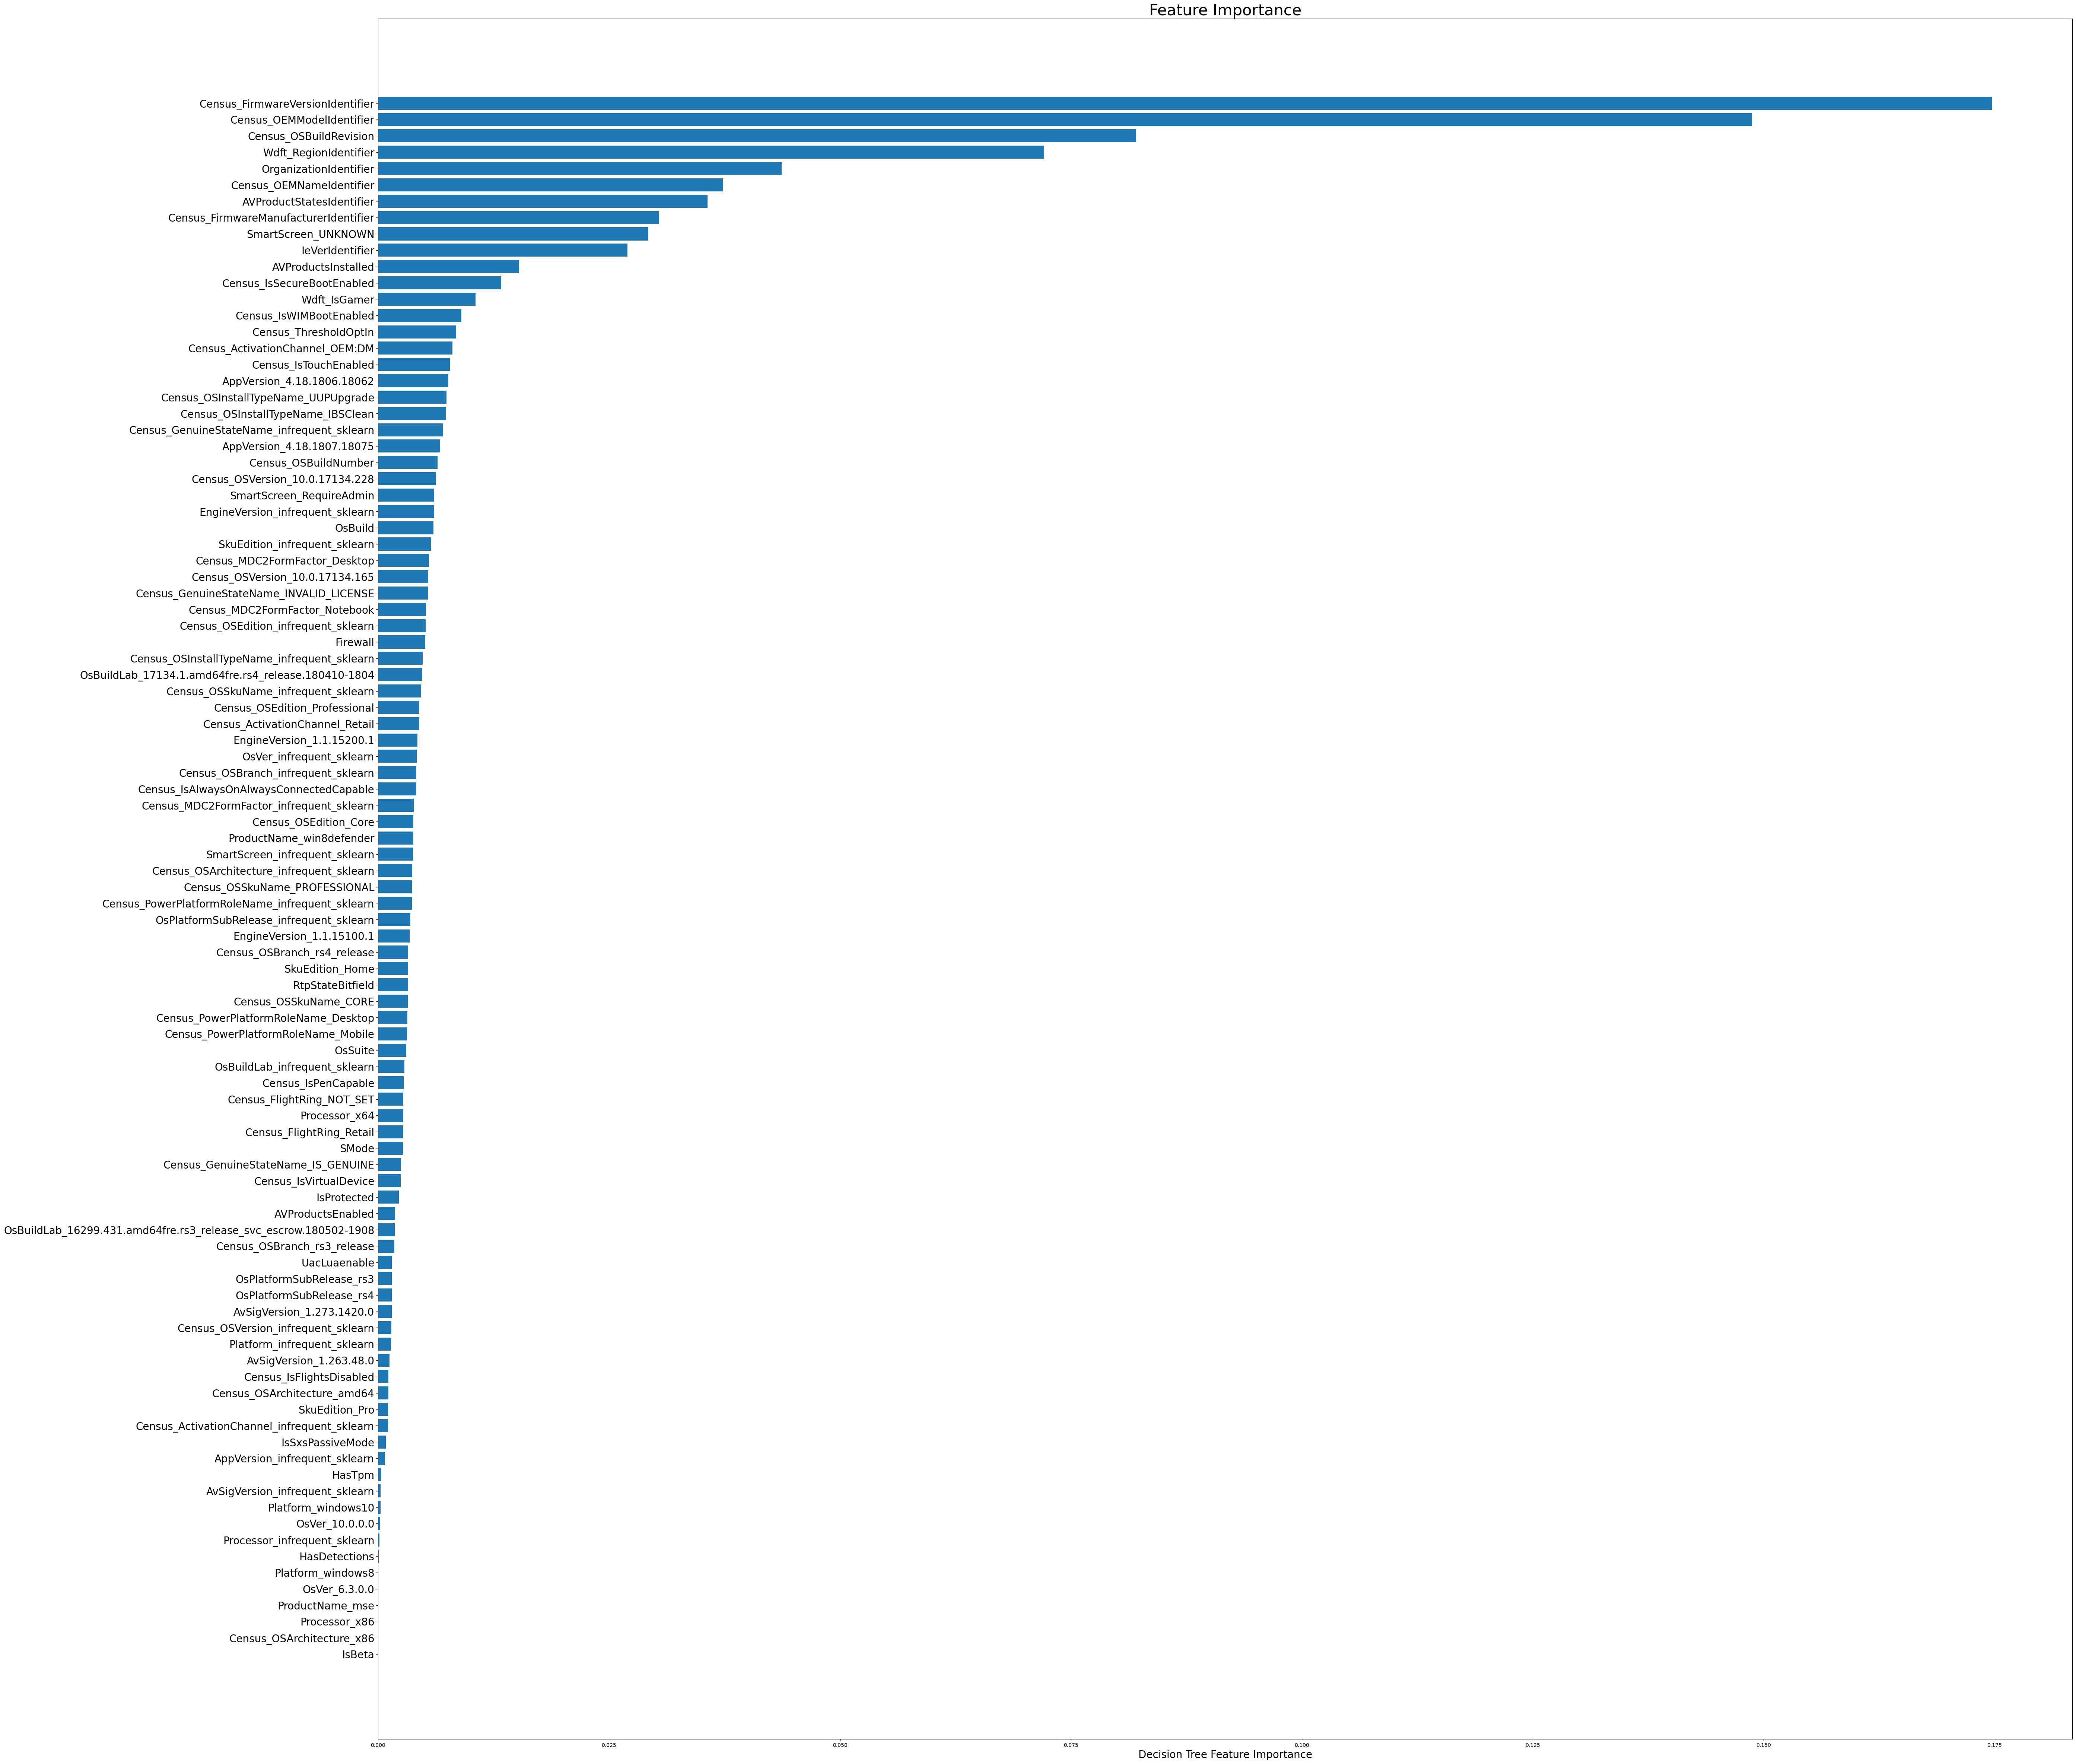

In [57]:
# Llamamos a la función de feature importances
show_features_importance_graph(df_3, clf)

In [58]:
# Obtención del accuracy en Decision Tree
it3_dt_acc = clf.score(X_test, y_test)
print(f"El accuracy para Decision Tree es: {round(it3_dt_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['3 iteracion', 'DecisionTree', 'accuracy', round(it3_dt_acc, 2)]

El accuracy para Decision Tree es: 0.56%


In [59]:
# Repetimos el proceso con Gradient Boosting
gbc = GradientBoostingClassifier() 
gbc.fit(X_train, y_train)
it3_gbc_acc = gbc.score(X_test, y_test)
print(f"El accuracy para Gbc es: {round(it3_gbc_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['3 iteracion', 'Gboost', 'accuracy', round(it3_gbc_acc, 2)]

El accuracy para Gbc es: 0.63%


In [60]:
# Repetimos la tercera iteración con XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
it3_xgb_acc = xgboost.score(X_test, y_test)
print(f"El accuracy para XGboost es: {round(it3_xgb_acc, 2)}%")
tabla_metricas.loc[len(tabla_metricas)] = ['3 iteracion', 'XGBoost', 'accuracy', round(it3_xgb_acc, 2)]

El accuracy para XGboost es: 0.64%


In [61]:
# Evaluamos las métricas de las 3 iteraciones
tabla_metricas

iteracion        modelo   metrica  valor
0     baseline  DecisionTree  accuracy   0.62
1     baseline        Gboost  accuracy   0.63
2     baseline       XGBoost  accuracy   0.64
3  2 iteracion  DecisionTree  accuracy   0.60
4  2 iteracion        Gboost  accuracy   0.63
5  2 iteracion       XGBoost  accuracy   0.63
6  3 iteracion  DecisionTree  accuracy   0.56
7  3 iteracion        Gboost  accuracy   0.63
8  3 iteracion       XGBoost  accuracy   0.64

### Optimización de hiperparámetros (eligiendo XGBoost)

Como fase final del proyecto, elijo el XGBoost(ya que me ha dado mejores resultados a lo largo de las 3 iteraciones realizadas). Procedemos a realizar la validación cruzada con *Random Search*, puesto que está comprobado que nos dará mejores resultados que *Grid Search.*

In [62]:
# Creamos el objeto XGBoostClassifier
classifier = XGBClassifier()
# Definimos los parámetros que deseamos ajustar y sus valores posibles
params = {
    'max_depth': np.arange(3, 8),
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'n_estimators': np.arange(50, 201, 50),
    'subsample': np.arange(0.8, 1.01, 0.05),
    'colsample_bytree': np.arange(0.8, 1.01, 0.05),
    'gamma': [0, 1, 5]
}
# Definimos el objeto KFold para la validación cruzada
kf = KFold(n_splits=4, shuffle=True, random_state=5)
# Creamos el objeto RandomizedSearchCV
xgb_cv = RandomizedSearchCV(
    classifier, param_distributions=params, n_iter=10, cv=kf, scoring='accuracy', random_state=42
)
# Ajustamos el modelo usando la validación cruzada
xgb_cv.fit(X_train, y_train)
# Imprimimos los mejores parámetros y la mejor puntuación
print("Best XGBoost parameters: {}".format(xgb_cv.best_params_))
print("Best XGBoost score: {}".format(xgb_cv.best_score_))

Best XGBoost parameters: {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.16, 'gamma': 5, 'colsample_bytree': 0.8}
Best XGBoost score: 0.6357250000000001


In [ ]:
# Obtenemos los scores de la validación cruzada
cv_scores = cross_val_score(xgb_cv, X_train, y_train, cv=kf)
print(cv_scores)
print(np.mean(cv_scores))

[0.62895  0.635875 0.63825  0.632475]
0.6338875


In [ ]:
# Obtenemos la matriz de confusión
y_pred = xgboost.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12728  7246]
 [ 7335 12691]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64     19974
           1       0.64      0.63      0.64     20026

    accuracy                           0.64     40000
   macro avg       0.64      0.64      0.64     40000
weighted avg       0.64      0.64      0.64     40000



In [ ]:
# Probabilidades de predicción
y_pred_probs = xgboost.predict_proba(X_test)[:, 1]
print(y_pred_probs[:10])

[0.61665064 0.7091131  0.4940572  0.6284471  0.4313593  0.25101268
 0.48611385 0.13771334 0.5699071  0.83673   ]


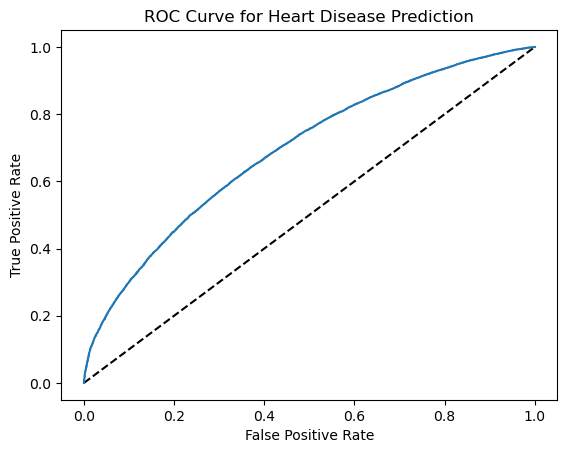

In [ ]:
# Generamos los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
# Plot tpr frente a fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease Prediction')
plt.show()

In [ ]:
# Calculamos roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))
# Calculamos la matriz de confusión
print(confusion_matrix(y_test, y_pred))
# Calculamos el reporte de clasificación
print(classification_report(y_test, y_pred))

0.6924213451920734
[[12728  7246]
 [ 7335 12691]]
              precision    recall  f1-score   support

           0       0.63      0.64      0.64     19974
           1       0.64      0.63      0.64     20026

    accuracy                           0.64     40000
   macro avg       0.64      0.64      0.64     40000
weighted avg       0.64      0.64      0.64     40000

